In [30]:
!pip install pycaret

In [31]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [32]:
import pandas as pd
#
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', header=None, names=['Sex','Length','Diam','Height','Whole','Shucked','Viscera','Shell','Rings'])

dataset.shape

data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (3759, 9)
Unseen Data For Predictions: (418, 9)


In [33]:
#checking the 1st 5 rows
dataset.head()

,Sex,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [34]:
from pycaret.classification import *
exp_mclf101 = setup(data = data, target = 'Sex', session_id=123) 

,Description,Value
0,session_id,123
1,Target,Sex
2,Target Type,Multiclass
3,Label Encoded,"F: 0, I: 1, M: 2"
4,Original Data,"(3759, 9)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [35]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5519,0.7535,0.5475,0.5433,0.5311,0.3215,0.3303,0.535
gbc,Gradient Boosting Classifier,0.5477,0.7457,0.5457,0.5361,0.5364,0.3170,0.3203,1.211
rf,Random Forest Classifier,0.5450,0.7403,0.5460,0.5383,0.5395,0.3152,0.3165,0.721
et,Extra Trees Classifier,0.5443,0.7420,0.5454,0.5362,0.5384,0.3142,0.3153,0.609
ada,Ada Boost Classifier,0.5439,0.7189,0.5438,0.5339,0.5318,0.3126,0.3163,0.177
lda,Linear Discriminant Analysis,0.5405,0.7459,0.5385,0.5346,0.5298,0.3057,0.3098,0.022
lightgbm,Light Gradient Boosting Machine,0.5374,0.7350,0.5383,0.5326,0.5330,0.3037,0.3050,0.288
ridge,Ridge Classifier,0.5340,0.0000,0.5329,0.5151,0.5113,0.2975,0.3046,0.018
qda,Quadratic Discriminant Analysis,0.5245,0.7356,0.5322,0.5094,0.5003,0.2903,0.3003,0.019
nb,Naive Bayes,0.5226,0.7344,0.5398,0.5037,0.4738,0.2946,0.3171,0.018


In [36]:
dt = create_model('dt')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5076,0.6280,0.5088,0.5072,0.5073,0.2590,0.2591
1,0.4335,0.5709,0.4326,0.4407,0.4351,0.1449,0.1457
2,0.5057,0.6292,0.5060,0.5023,0.5033,0.2583,0.2586
3,0.4715,0.6009,0.4729,0.4674,0.4689,0.2048,0.2051
4,0.4791,0.6073,0.4789,0.4970,0.4850,0.2162,0.2173
5,0.4905,0.6171,0.4953,0.4917,0.4899,0.2365,0.2372
6,0.4829,0.6114,0.4855,0.4913,0.4856,0.2243,0.2250
7,0.5513,0.6607,0.5498,0.5539,0.5518,0.3236,0.3241
8,0.5095,0.6290,0.5088,0.5010,0.5030,0.2607,0.2618
9,0.5399,0.6532,0.5431,0.5401,0.5399,0.3091,0.3092


In [37]:
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [38]:
knn = create_model('knn')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5189,0.6976,0.5221,0.5176,0.5178,0.2784,0.2787
1,0.5057,0.6859,0.5060,0.5060,0.5058,0.2567,0.2567
2,0.4715,0.6832,0.4742,0.4601,0.4639,0.2083,0.2091
3,0.4905,0.6728,0.4919,0.4819,0.4856,0.2346,0.2348
4,0.4677,0.6833,0.4733,0.4695,0.4659,0.2041,0.2056
5,0.5589,0.7293,0.5598,0.5565,0.5577,0.3368,0.3368
6,0.4905,0.6961,0.4935,0.4953,0.4922,0.2359,0.2363
7,0.5513,0.7275,0.5582,0.5501,0.5479,0.3290,0.3309
8,0.5019,0.7135,0.5067,0.4880,0.4908,0.2547,0.2568
9,0.5665,0.7400,0.5741,0.5684,0.5613,0.3531,0.3574


In [39]:
lr = create_model('lr')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5644,0.7715,0.5602,0.5674,0.5395,0.3403,0.3533
1,0.5323,0.7204,0.5271,0.5093,0.5061,0.2924,0.3009
2,0.5513,0.7481,0.5458,0.5386,0.5259,0.3202,0.3305
3,0.5095,0.7364,0.5057,0.5132,0.4910,0.2573,0.2656
4,0.5703,0.7565,0.5647,0.5672,0.5541,0.3485,0.3571
5,0.5817,0.7654,0.5736,0.5892,0.5628,0.3642,0.3774
6,0.5057,0.7355,0.5038,0.4873,0.4858,0.2532,0.2584
7,0.5551,0.7618,0.5513,0.5428,0.5335,0.3262,0.3347
8,0.5627,0.7621,0.5596,0.5434,0.5376,0.3390,0.3478
9,0.5856,0.7769,0.5834,0.5748,0.5751,0.3741,0.3774


In [40]:
tuned_dt = tune_model(dt)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5038,0.7088,0.5032,0.5010,0.4972,0.2496,0.2526
1,0.5475,0.7194,0.5494,0.5327,0.5333,0.3204,0.3243
2,0.5703,0.7548,0.5639,0.5669,0.5580,0.3488,0.3562
3,0.5133,0.7089,0.5157,0.5111,0.5120,0.2682,0.2682
4,0.5475,0.7293,0.5406,0.5466,0.5342,0.3120,0.3215
5,0.5665,0.7383,0.5676,0.5585,0.5611,0.3475,0.3483
6,0.5095,0.7218,0.5062,0.5056,0.4766,0.2579,0.2710
7,0.5817,0.7734,0.5833,0.5736,0.5767,0.3703,0.3709
8,0.5285,0.7524,0.5322,0.4995,0.4958,0.2924,0.3034
9,0.5627,0.7559,0.5649,0.5597,0.5609,0.3418,0.3420


In [41]:
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [42]:
import numpy as np
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5265,0.7369,0.5291,0.5143,0.5186,0.2879,0.2888
1,0.5437,0.7137,0.5463,0.5348,0.5376,0.3156,0.3165
2,0.4829,0.7261,0.4862,0.4650,0.4702,0.2255,0.2272
3,0.4981,0.7172,0.4958,0.4867,0.4893,0.2429,0.2445
4,0.5247,0.7369,0.5273,0.5192,0.5215,0.2866,0.2869
5,0.6046,0.7673,0.6077,0.5949,0.5974,0.4061,0.4076
6,0.5475,0.7341,0.5490,0.5463,0.5460,0.3184,0.3190
7,0.5323,0.7520,0.5359,0.5195,0.5247,0.2978,0.2984
8,0.5399,0.7460,0.5469,0.5165,0.5225,0.3112,0.3144
9,0.5970,0.7898,0.5999,0.5858,0.5895,0.3952,0.3963


In [43]:
tuned_lr = tune_model(lr)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5758,0.7703,0.5746,0.5770,0.5636,0.3596,0.3663
1,0.5361,0.7255,0.5336,0.5198,0.5188,0.2995,0.3047
2,0.5627,0.7513,0.5600,0.5533,0.5483,0.3398,0.3452
3,0.5171,0.7442,0.5155,0.5120,0.4998,0.2708,0.2775
4,0.5703,0.7568,0.5670,0.5545,0.5521,0.3506,0.3568
5,0.6046,0.7667,0.6004,0.5991,0.5926,0.4022,0.4079
6,0.5171,0.7402,0.5172,0.4943,0.4961,0.2724,0.2774
7,0.5856,0.7651,0.5828,0.5772,0.5655,0.3732,0.3822
8,0.5894,0.7682,0.5895,0.5762,0.5709,0.3814,0.3886
9,0.5856,0.7829,0.5858,0.5697,0.5729,0.3756,0.3785


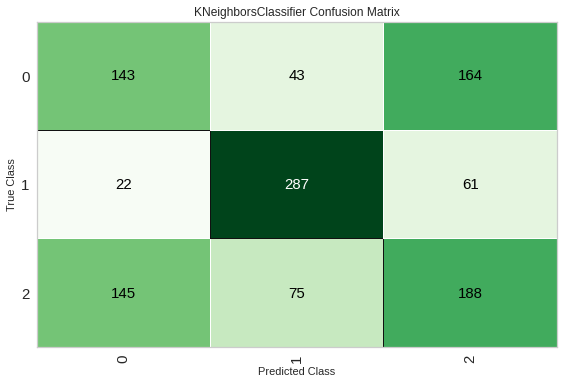

In [44]:
plot_model(tuned_knn, plot = 'confusion_matrix')

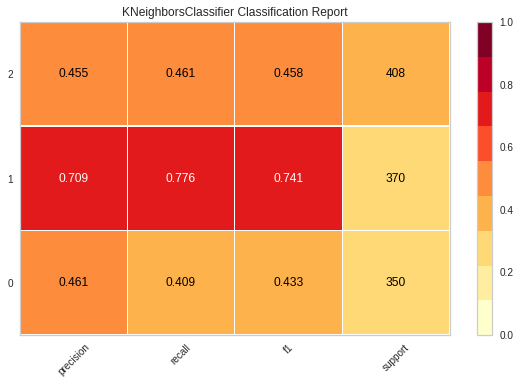

In [45]:
plot_model(tuned_knn, plot = 'class_report')

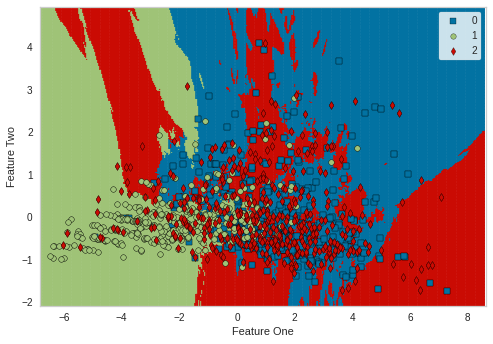

In [46]:
plot_model(tuned_knn, plot='boundary')

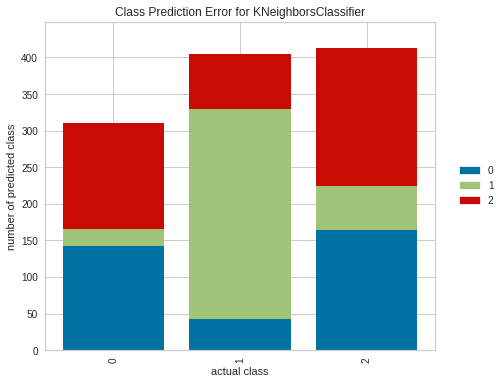

In [47]:
plot_model(tuned_knn, plot = 'error')

In [48]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [49]:
predict_model(tuned_knn);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.5479,0.7423,0.5483,0.5402,0.5431,0.3196,0.3202


In [50]:
final_knn = finalize_model(tuned_knn)

In [51]:
unseen_predictions = predict_model(final_knn, data=data_unseen)
unseen_predictions.head()


,Sex,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Rings,Label,Score
0,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,I,0.7879
1,M,0.430,0.350,0.110,0.4060,0.1675,0.0810,0.135,10,F,0.4545
2,F,0.535,0.405,0.145,0.6845,0.2725,0.1710,0.205,10,F,0.3939
3,M,0.365,0.295,0.080,0.2555,0.0970,0.0430,0.100,7,I,0.9394
4,F,0.550,0.415,0.135,0.7635,0.3180,0.2100,0.200,9,I,0.3636


In [52]:
save_model(final_knn,'Final KNN Model 14Dec2020')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Sex',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                 ('fix_perfect', Remove_100(target='Sex')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
            

In [53]:
saved_final_knn = load_model('Final KNN Model 14Dec2020')

Transformation Pipeline and Model Successfully Loaded


In [54]:
new_prediction = predict_model(saved_final_knn, data=data_unseen)
new_prediction.head()

,Sex,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Rings,Label,Score
0,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,I,0.7879
1,M,0.430,0.350,0.110,0.4060,0.1675,0.0810,0.135,10,F,0.4545
2,F,0.535,0.405,0.145,0.6845,0.2725,0.1710,0.205,10,F,0.3939
3,M,0.365,0.295,0.080,0.2555,0.0970,0.0430,0.100,7,I,0.9394
4,F,0.550,0.415,0.135,0.7635,0.3180,0.2100,0.200,9,I,0.3636
